In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Original image upload and noisy image creation

Text(0.5, 1.0, 'Noisy')

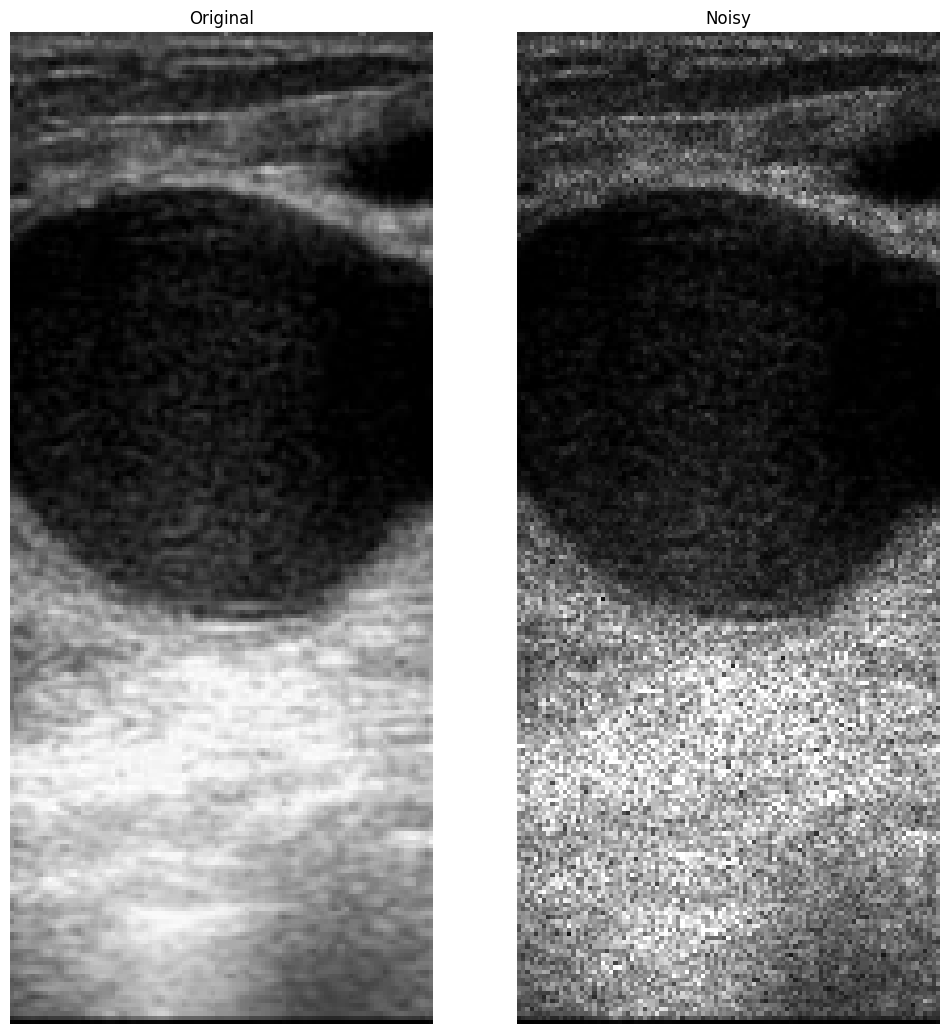

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import (
 denoise_bilateral,
 denoise_wavelet,
 denoise_nl_means,
)
from skimage import data, img_as_float,io,color
from skimage.util import random_noise
from scipy.ndimage import uniform_filter
# Load image
original2 = io.imread('ArunaGrover_small.png')
original = img_as_float(color.rgb2gray(original2))
#original = np.mean(original2/256,2) # manual gray scale transformation
noisy = random_noise(original,mode='speckle', var=0.05)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 15), sharex=True, sharey=True)
#plt.gray()
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')

## Mean filter

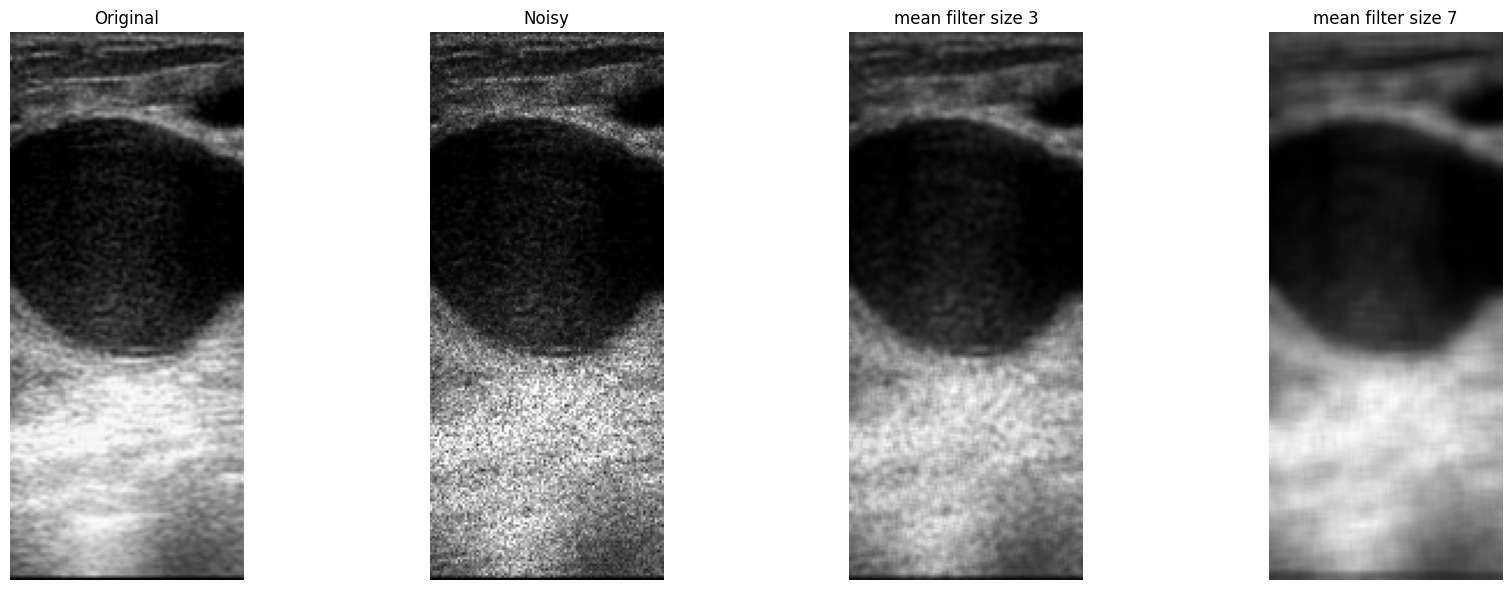

In [ ]:
# size =3
mean_3 = uniform_filter(noisy, size=3)

# size 7
mean_7 = uniform_filter(noisy, size=7)

# plotting
fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(mean_3,cmap='gray')
ax[2].axis('off')
ax[2].set_title('mean filter size 3')
ax[3].imshow(mean_7,cmap='gray')
ax[3].axis('off')
ax[3].set_title('mean filter size 7')

plt.tight_layout()
plt.show()

## Mean filter interpretation
Mean filtering reduces noise by averaging pixel values in a uniform way, treating noise and edges equally. As the kernel size increases, this uniform treatment causes progressive blurring of edges, degradation of image quality, and a reduced capacity to identify anatomical structures, leading to a significant loss of diagnostic detail.

## Bilateral filter

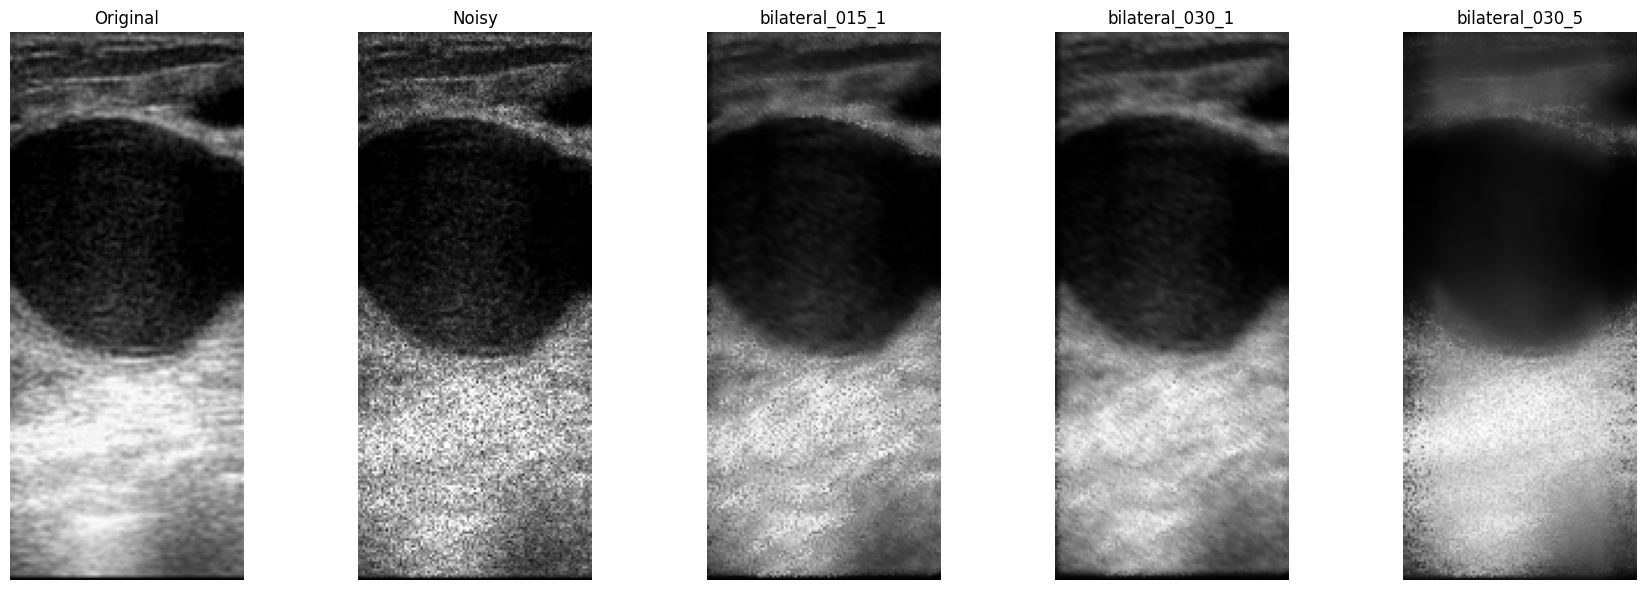

In [2]:
# applying the bilateral filter to the noisy image

#sigma_color 0.15 and sigma_spatial 1
bilateral_015_1 = denoise_bilateral(
    noisy,
    sigma_color=0.15,
    sigma_spatial=1
)

#sigma_color 0.30 and sigma_spatial 1
bilateral_030_1 = denoise_bilateral(
    noisy,
    sigma_color=0.30,
    sigma_spatial=1
)

#sigma_color 0.30 and sigma_spatial 5
bilateral_030_5 = denoise_bilateral(
    noisy,
    sigma_color=0.30,
    sigma_spatial=5
)


# plotting

fig, ax = plt.subplots(1, 5, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(bilateral_015_1,cmap='gray')
ax[2].axis('off')
ax[2].set_title('bilateral_015_1')
ax[3].imshow(bilateral_030_1,cmap='gray')
ax[3].axis('off')
ax[3].set_title('bilateral_030_1')
ax[4].imshow(bilateral_030_5,cmap='gray')
ax[4].axis('off')
ax[4].set_title('bilateral_030_5')

plt.tight_layout()
plt.show()

## Bilateral filter interpretation

The bilateral filter is a **edge-preserving** smoothing filter, intended to reduce noise while mantaining sharp edges. This filter considers 2 criteria when computing the new value of a pixel:
- spatial distance (sigma_spatial) -> controls the exten of the spatial neighborhood pixels considered during the filter averaging. Increasing the value contributes to global smoothing effects. there is risk to blur anatomical structures if very high
- intesity similarity (sigma_color) -> determines how different the intensity of a neighboor piyel can be and still contribute to the averaging of the filter.  smaller values will only consider piyels with very similar intensities, allowing strong edge preservation. Larger values considers larger insities differences, having a stronger noise suppresion but with risk of losing fine details and weaker edges.

This dual mechanism, when values selected properly, allows the filter to smooth homogeneous regons while preventing blurring across edges.

In the images above we can observe how a sigma_spatial of 1 sigma_color of 0.15, allows for a better reduction of the fine grain noise while mantaining

## Wavelet filter

Text(0.5, 1.0, 'img_wavelet')

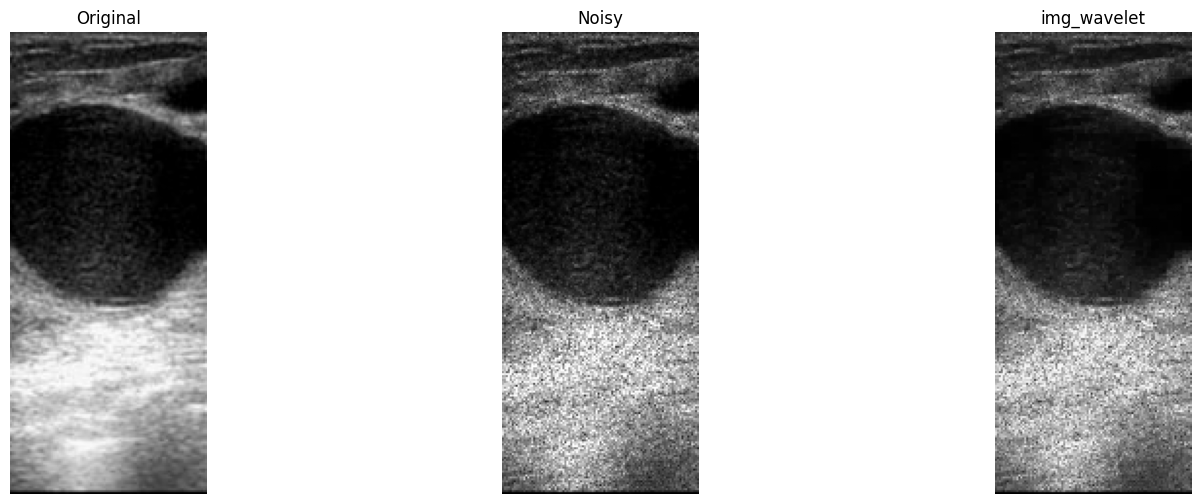

In [ ]:
img_wavelet = denoise_wavelet(
    noisy,
    rescale_sigma=True
)

# plotting

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(img_wavelet,cmap='gray')
ax[2].axis('off')
ax[2].set_title('img_wavelet')


## Wavelet filter interpretation
Wavelet filtering is implemented by decomposing the image into multiple resolution scales, on whose coefficients thresholding operations are applied. Its application requires the definition of a set of parameters, such as the selected wavelet family, the number of decomposition levels, and the thresholding method used. The configuration of these parameters controls the degree of smoothing and the amount of high-frequency information preserved in the reconstructed image, directly influencing the final visual appearance and the distribution of frequency information.

- rescale_sigma: Indicates whether the estimated noise level is automatically rescaled according to the selected wavelet. This parameter affects the internal computation of the threshold applied to the wavelet coefficients during image reconstruction.

- mode: Specifies the thresholding mode applied to the wavelet coefficients. It determines how high-frequency coefficients are modified during the denoising process, controlling the manner in which they are attenuated or suppressed during image reconstruction.

## Non-Local Means



Text(0.5, 1.0, 'img_nlm_03')

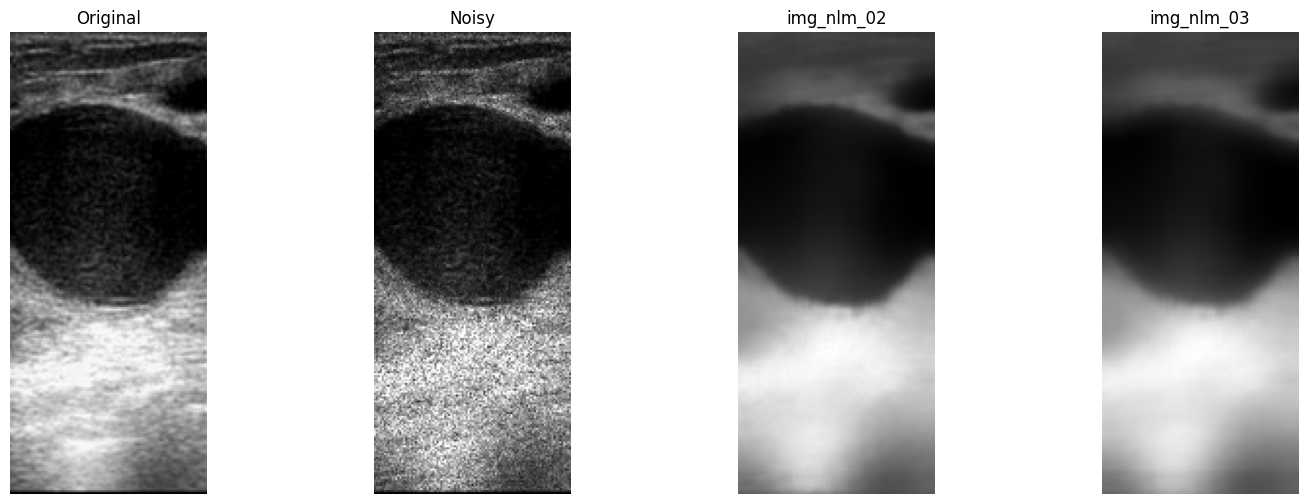

In [ ]:
img_nlm_02 = denoise_nl_means(
    noisy,
    h=0.2,
    fast_mode=True,
    channel_axis=None
)

img_nlm_03 = denoise_nl_means(
    noisy,
    h=0.3,
    fast_mode=True,
    channel_axis=None
)


# plotting

fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(img_nlm_02,cmap='gray')
ax[2].axis('off')
ax[2].set_title('img_nlm_02')
ax[3].imshow(img_nlm_03,cmap='gray')
ax[3].axis('off')
ax[3].set_title('img_nlm_03')

## Non-Local Mean Filter Interpretation

Non-Local Means (NLM) is an advanced denoising algorithm that averages similar patches across the image, not just local neighbors.

It is particularly useful for ultrasound images, which are inherently noisy due to speckle, because it reduces noise without strongly blurring edges or anatomical details.

The parameter h controls the degree of smoothing: higher h removes more noise but can also reduce fine details.

A little explanation about the images that we computed:

- img_nlm_02 (h=0.2): moderate smoothing; some noise is removed while keeping edges reasonably sharp.

- img_nlm_03 (h=0.3): (stronger denoising) more noise is removed but small structures may become slightly blurred.




# Conclussions and comparison between filters

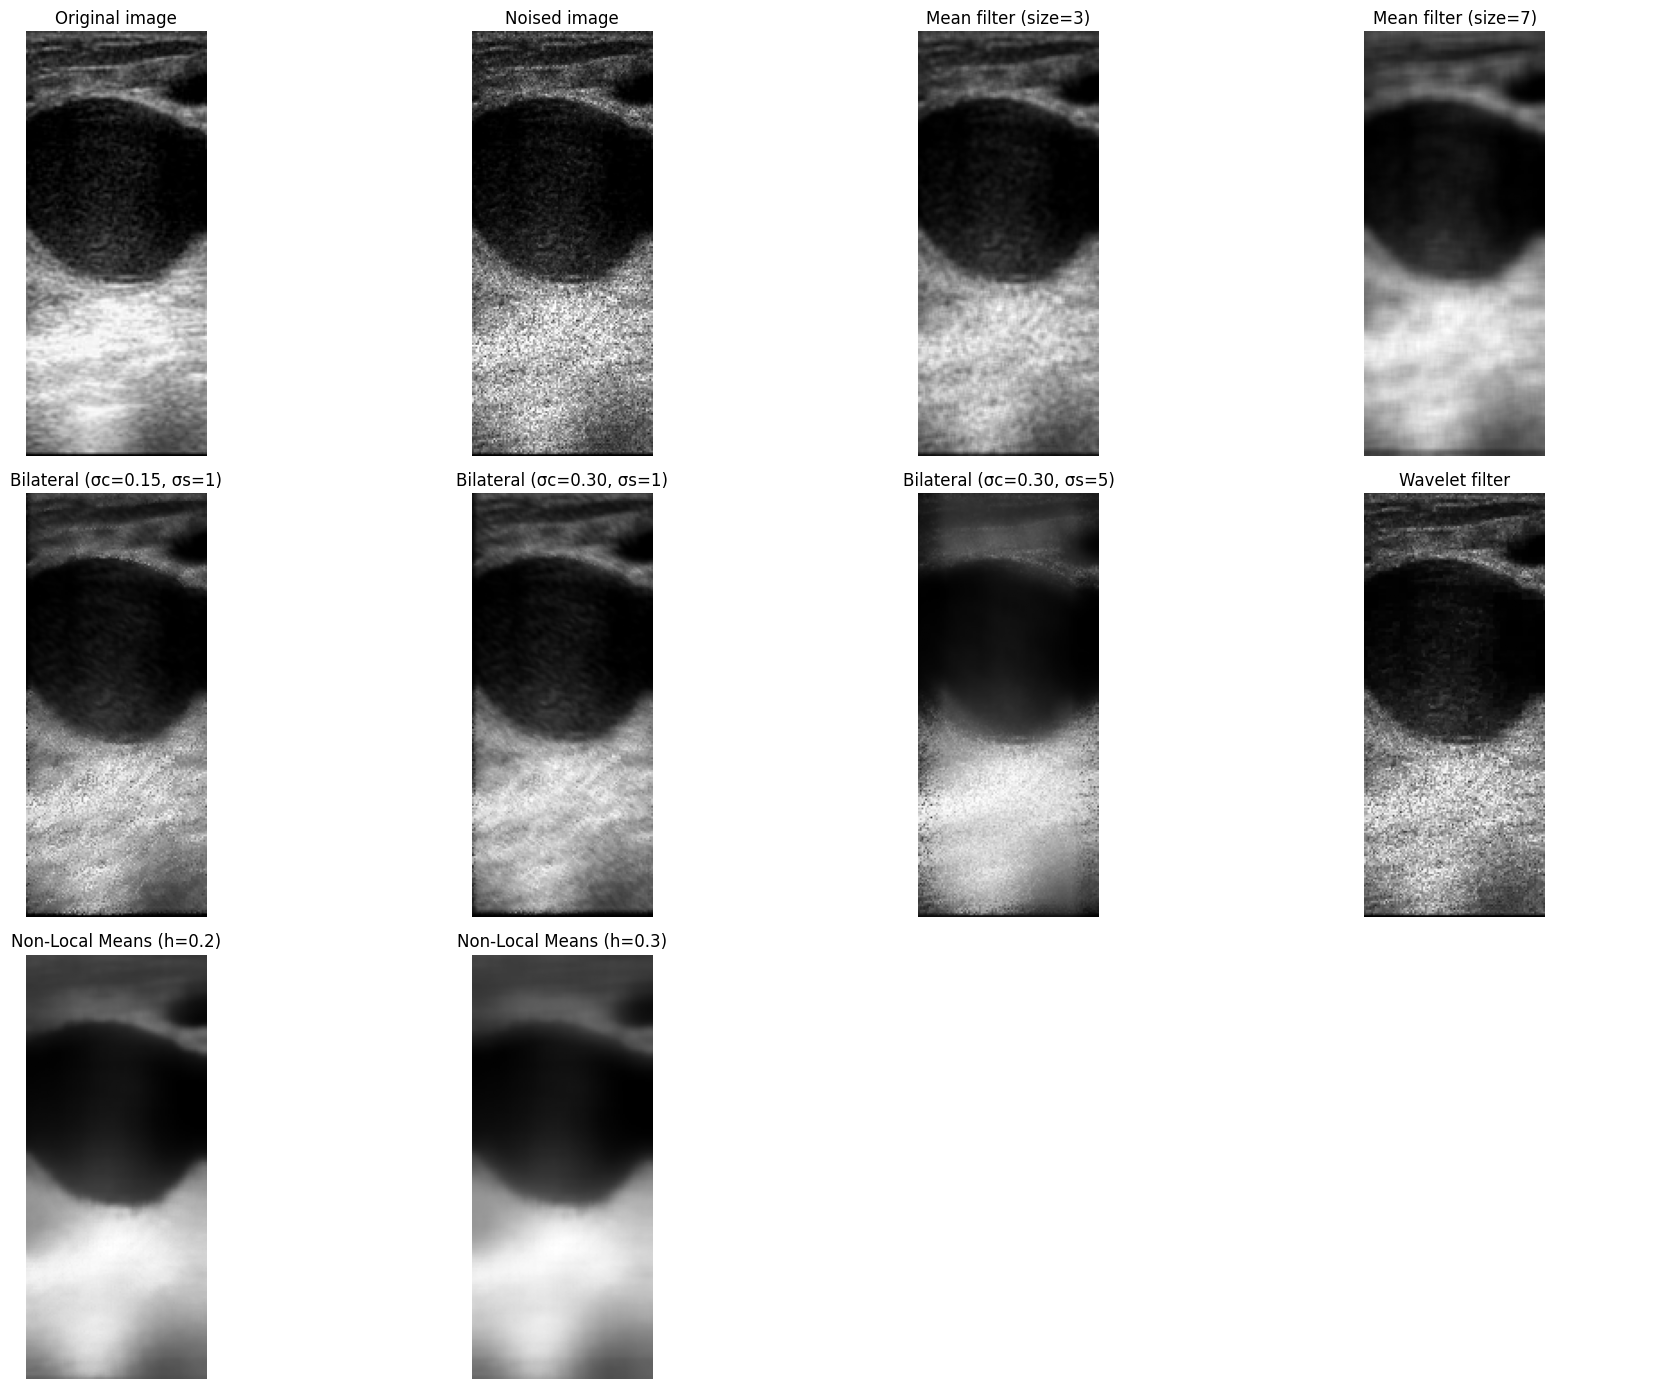

In [ ]:
# all plots
fig, axes = plt.subplots(3, 4, figsize=(18, 14))
ax = axes.ravel()

images = [
    original,
    noisy,
    mean_3,
    mean_7,
    bilateral_015_1,
    bilateral_030_1,
    bilateral_030_5,
    img_wavelet,
    img_nlm_02,
    img_nlm_03
]

titles = [
    "Original image",
    "Noised image",
    "Mean filter (size=3)",
    "Mean filter (size=7)",
    "Bilateral (σc=0.15, σs=1)",
    "Bilateral (σc=0.30, σs=1)",
    "Bilateral (σc=0.30, σs=5)",
    "Wavelet filter",
    "Non-Local Means (h=0.2)",
    "Non-Local Means (h=0.3)"
]

for i in range(len(images)):
    ax[i].imshow(images[i], cmap="gray")
    ax[i].set_title(titles[i])
    ax[i].axis("off")

# shut down non used cells
for j in range(len(images), len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()
